# Библиотека matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных - `matplotlib`. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. 

Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно). 

Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки:

* `plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси
* `plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.
* `plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.
*  `plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$.
* `plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`


Вспомогательные функции:

*    `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$
*    `plt.show()` — показать график.
*    `plt.subplot(...)` — добавить подграфик
*    `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси
*    `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси
*    `plt.title(name)` — установить имя графика
*    `plt.xlabel(name)` — установить название горизонтальной оси
*    `plt.ylabel(name)` — установить название вертикальной оси
*    `plt.legend(loc=...)` — сделать легенду в позиции loc
*    `plt.grid()` — добавить сетку на график
*    `plt.savefig(filename)` — сохранить график в файл


http://matplotlib.org/gallery.html (англ.) — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой


In [0]:
import numpy.random as npr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import *
from numpy.random import randn
from pylab import *
import scipy.stats as sps
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

Посмотрим, что можно делать с библиотекой

## Основы matplotlib

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

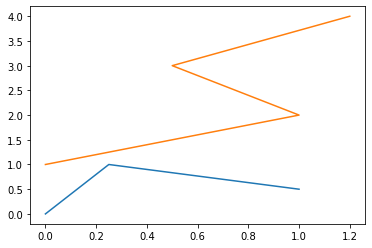

In [0]:
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

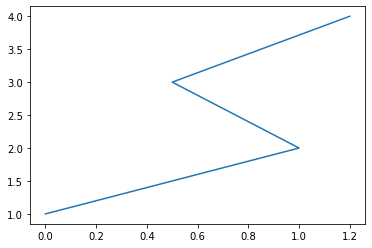

In [0]:
plt.figure()
plt.plot([0, 1, 0.5, 1.2],[1, 2, 3, 4])
plt.show()

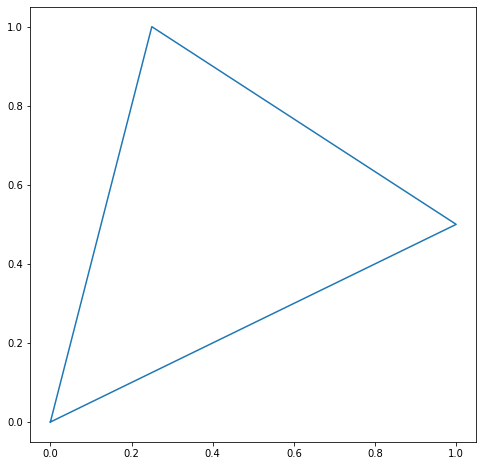

In [0]:
# можно задавать размер изображения
plt.figure(figsize=(8,8))
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

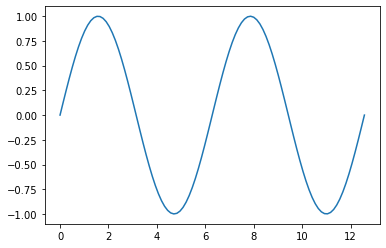

In [0]:
# тут мы создаем массив numpy встроенной функцией
# используем функцию из numpy, которая создает массив из 100 точек в диапазоне от 0 до 4 Pi с равными шагами
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

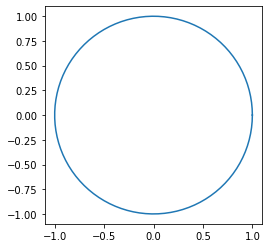

In [0]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
# поэлементно приминяем функции к сгенерированному массиву данных
plt.plot(np.cos(t), np.sin(t))
plt.axes().set_aspect(1)
plt.show()

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу.

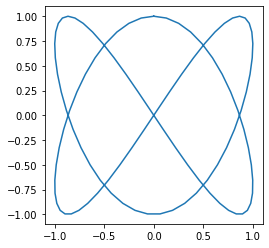

In [0]:
plt.figure()
plt.plot(np.sin(2 * t), np.cos(3 * t))
plt.axes().set_aspect(1)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

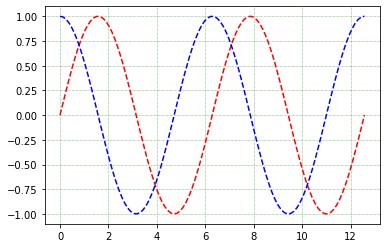

In [0]:
x = np.linspace(0, 4 * np.pi, 100)
plt.figure()
plt.grid(color='g',linestyle=':',linewidth=0.5)
plt.plot(x, np.sin(x), 'r--')
plt.plot(x, np.cos(x), 'b--')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

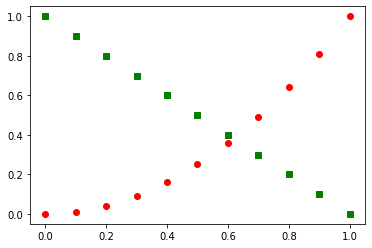

In [0]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

Библиотека не ограничивается созданием только одним типом графика (line plot). Давайте рассмотрим примеры других типов:

Диаграмма разброса (scatter plot)

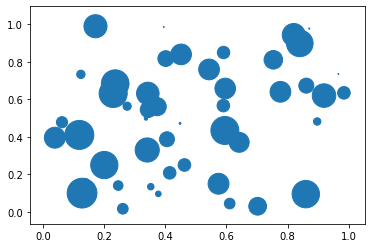

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123456)

# создадим 50 точек из нормального распределния
N = 50
# координаты х, у
x = np.random.rand(N)
y = np.random.rand(N)
# и их радиус
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
# отобразим
plt.scatter(x, y, s=area)
plt.show()

Столбчатые диаграммы (bar chart)

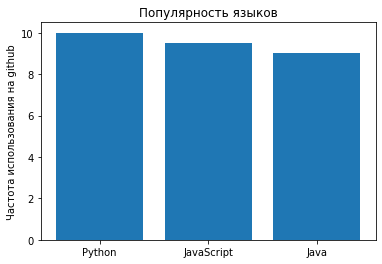

In [0]:
# задаем подписи отображаемых объектов
objects = ('Python', 'JavaScript', 'Java')
# задаем значения позиций подписей (по х)
y_pos = np.arange(len(objects))
# задаем значения (по y)
popularity = [10.,9.5,9]
# создаем столбчатую диаграмму с вышеобозначенными значениями
plt.bar(y_pos, popularity)
# задаем подписи по оси х
plt.xticks(y_pos, objects)
# задаем название по y
plt.ylabel('Частота использования на github')
# задаем название всего графика
plt.title('Популярность языков')

plt.show()

Гистограммы (histogram)

In [0]:
# среднее распределения
mu = 42 
# среднекадратичное отклонение
sigma = 3.14 
# значения, сгенерированные из нормального распределения
# подробнее о нормальном распределении - https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
x = mu + sigma * np.random.randn(10000)
# отобразим несколько элементов
print(x)

[43.68486135 40.46239802 43.1598352  ... 37.84693139 39.53080765
 38.08511837]


(array([  2.,   1.,  10.,   9.,  10.,  17.,  23.,  29.,  44.,  53.,  67.,
        107., 138., 192., 220., 250., 335., 306., 401., 443., 455., 531.,
        506., 609., 618., 523., 558., 528., 449., 411., 430., 336., 338.,
        240., 189., 148., 134.,  91.,  76.,  55.,  39.,  24.,  19.,  15.,
          7.,   6.,   4.,   1.,   1.,   2.]),
 array([30.94444913, 31.39778093, 31.85111274, 32.30444454, 32.75777635,
        33.21110815, 33.66443996, 34.11777176, 34.57110357, 35.02443537,
        35.47776718, 35.93109898, 36.38443078, 36.83776259, 37.29109439,
        37.7444262 , 38.197758  , 38.65108981, 39.10442161, 39.55775342,
        40.01108522, 40.46441702, 40.91774883, 41.37108063, 41.82441244,
        42.27774424, 42.73107605, 43.18440785, 43.63773966, 44.09107146,
        44.54440327, 44.99773507, 45.45106687, 45.90439868, 46.35773048,
        46.81106229, 47.26439409, 47.7177259 , 48.1710577 , 48.62438951,
        49.07772131, 49.53105312, 49.98438492, 50.43771672, 50.89104853,
 

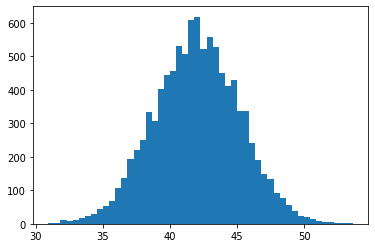

In [0]:
num_bins = 50
# Гистограмма переменной показывает распределение частоты этой переменной
# (высота столбца - сколько элеметов попало в диапазон этого столбца)
# В этом случае мы указали num_bins - количество столбцов заранее
plt.hist(x, num_bins)

(array([  32.,  166.,  724., 1735., 2719., 2469., 1533.,  504.,  104.,
          14.]),
 array([30.94444913, 33.21110815, 35.47776718, 37.7444262 , 40.01108522,
        42.27774424, 44.54440327, 46.81106229, 49.07772131, 51.34438033,
        53.61103936]),
 <a list of 10 Patch objects>)

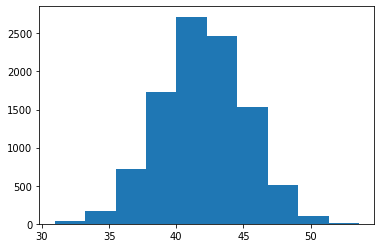

In [0]:
# а можем оставить это на усмотрение алгоритма
plt.hist(x)

Круговые диаграммы (pie chart)

In [0]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

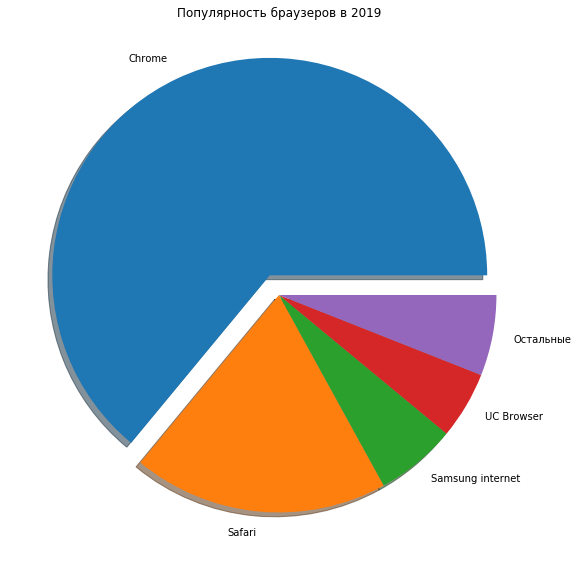

In [0]:

# определяем названия браузеров
labels = 'Chrome', 'Safari', 'Samsung internet', 'UC Browser', 'Остальные'
# определяем значения для соответсвующих подписей
sizes = [64, 19, 6, 5, 6]
# определяем насколько мы ходим выделить каждый
explode = (0.1, 0, 0, 0, 0)
# создаем объект подграфика и ось с данными и подписями
fig1, ax1 = plt.subplots(figsize=(10, 10))
# функции имеют много различных настроек, к примеру тени
ax1.pie(sizes, explode=explode, labels=labels, shadow=True)
# задаем название всего графика
plt.title('Популярность браузеров в 2019')
# отображаем
plt.show()

# Обработка числовых массивов даных

## Основы numpy

In [0]:
# импортируем саму библиотеку
import numpy as np

### Массивы

Главный объект numpy - array. Массивы схожи со списками в python, но элементы массива должны иметь одинаковый тип данных (float и int). С массивами можно проводить числовые операции с большим объемом информации в разы быстрее и, главное, намного эффективнее чем со списками.

In [0]:
a = np.array([1, 2, 3])
print(a, '|', type(a))

[1 2 3] | <class 'numpy.ndarray'>


Со всеми элементам можно получить доступ и манипулировать ими также, как вы бы это делали с обычными списками:

### Слайсинг 

In [0]:
a[:2]

array([1, 2])

In [0]:
a[::2]

array([1, 3])

Массивы могут быть и многомерными:

In [0]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
print(a, '|', type(a))

[[1. 2. 3.]
 [4. 5. 6.]] | <class 'numpy.ndarray'>


In [0]:
a[1,2]

6.0

Array slicing работает с многомерными массивами аналогично, как и с одномерными, применяя каждый срез, как фильтр для установленного измерения. Используйте ":" в измерении для указывания использования всех элементов этого измерения:

In [0]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
# выбрали элементы с шагом 2 второй строки массива
a[1,::2]

array([4., 6.])

### Методы

Метод shape возвращает количество строк и столбцов в матрице:

In [0]:
a.shape

(2, 3)

float64, это числовой тип данных в numpy, который используется для хранения вещественных чисел двойной точности по аналогии с float в Python.

Метод dtype возвращает тип переменных, хранящихся в массиве:

In [0]:
a.dtype

dtype('float64')

Метод len возвращает длину первого измерения (оси):

In [0]:
len(a)

2

По аналогии с list можно проверять вхождение элемента

In [0]:
6 in a

True

### Reshape

Массивы можно переформировать при помощи метода, который задает новый многомерный массив. Следуя следующему примеру, мы переформатируем одномерный массив из 12 элементов в двумерный массив, состоящий из 4 строк и 3 столбцов:

(метод reshape создает новый массив, а не модифицирует оригинальный)

In [0]:
a = np.array(range(12), float)
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [0]:
a = a.reshape((4, 3))
a

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

### Работа по ссылке

Работа по ссылке как и в python:

In [0]:
a = np.array([1, 2, 3])
b = a
c =  a.copy()

# меняем 0й элемент
a[0] = 0

print(f'Измененный массив а {a}')
print(f'Измененный массив b {b}  <-- изменился по ссылке т.к. поменяти 0й элемент а')
print(f'Измененный массив c {c}  <-- создали копию в памяти')

Измененный массив а [0 2 3]
Измененный массив b [0 2 3]  <-- изменился по ссылке т.к. поменяти 0й элемент а
Измененный массив c [1 2 3]  <-- создали копию в памяти


Можно преобразовать обратно в список:

In [0]:
a.tolist()

[0, 2, 3]

Можно сделать и обратное: конвертируем в одномерный

In [0]:
a.flatten()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

### Объединение

Массивы можно объединять

In [0]:
a = np.array([[1, 2], [3, 4]], float)
b = np.array([[5, 6], [7,8]], float)
np.concatenate((a,b))

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

Если массив не одномерный, можно задать ось, по которой будет происходить соединение. По умолчанию (не задавая значения оси), соединение будет происходить по первому измерению:

In [0]:
np.concatenate((a,b), axis=0)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [0]:
np.concatenate((a,b), axis=1)

array([[1., 2., 5., 6.],
       [3., 4., 7., 8.]])

## Основы pandas

In [0]:
# импортируем библиотеку
import pandas as pd

### Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`, они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [0]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Полезная информация о датафрейме


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [0]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

### Индексация

Индексация по аналогии:

In [0]:
s[2]

5.0

In [0]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [0]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [0]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

### Сложение


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [0]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`

In [0]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

### Индексация

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [0]:
s.index

RangeIndex(start=0, stop=6, step=1)


Но можно создавать наборы данных с индексом, заданным списком.

In [0]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [0]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [0]:
s.c

5.0

Набор данных можно создать из словаря.

In [0]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [0]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [0]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [0]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01    0.230592
2016-01-02    0.634709
2016-01-03   -0.337821
2016-01-04   -0.490717
2016-01-05   -1.955437
2016-01-06   -0.136192
2016-01-07   -0.135905
2016-01-08   -0.079022
2016-01-09    1.806935
2016-01-10   -0.762253
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [0]:
s>0

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
2016-01-06    False
2016-01-07    False
2016-01-08    False
2016-01-09     True
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [0]:
s[s>0]

2016-01-01    0.230592
2016-01-02    0.634709
2016-01-09    1.806935
dtype: float64

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [0]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


### Индексация, слайсинг и доступ к переменным

In [0]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [0]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [0]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [0]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [0]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [0]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [0]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [0]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [0]:
df.loc['b','one']

2.0

In [0]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [0]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [0]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [0]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [0]:
#del df['two']
df['foo']=0.
# df.drop(['foo'], axis=1)
del df['foo']
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


### Функции для сортировки

In [0]:
mask = df.apply(lambda x: x['one'] < 1.5 or x['two'] > 2.5, axis=1)
mask

a     True
b    False
c     True
d     True
dtype: bool

In [0]:
df[mask]

,one,two,three,flag
a,1.0,1,1.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


### Объединение и добавление новых столбцов


Добавим копию столбца `one`, в которую входят только строки до второй.

In [0]:
df['one_tr']=df['one'][:2]
df

,one,two,three,flag,one_tr
a,1.0,1,1.0,False,1.0
b,2.0,2,4.0,False,2.0
c,3.0,3,9.0,True,NaN
d,NaN,4,NaN,True,NaN


In [0]:
df1=df.loc[:,['one','one_tr']]
df1

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [0]:
df2=pd.DataFrame({'one':{'a':0,'b':1},'one_tr':{'b':2}})
df2

,one,one_tr
a,0,NaN
b,1,2.0


In [0]:
df3 = pd.concat([df,df2], axis=0)
df3

,flag,one,one_tr,three,two
a,False,1.0,1.0,1.0,1.0
b,False,2.0,2.0,4.0,2.0
c,True,3.0,NaN,9.0,3.0
d,True,NaN,NaN,NaN,4.0
a,NaN,0.0,NaN,NaN,NaN
b,NaN,1.0,2.0,NaN,NaN


# Полезные ссылки и доп материалы

Освоить основы каждой библиотеки за 10-15 минут:
#### numpy
https://docs.scipy.org/doc/numpy/user/quickstart.html
#### pandas
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

#### matplotlib

https://matplotlib.org/3.1.1/tutorials/index.html

## Exploratory data analysis

Давайте рассмотрим пример исследования набора данных на примере данных о пассажирах Титаника.

In [0]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2020-05-08 21:45:03--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.04s   

2020-05-08 21:45:03 (1.04 MB/s) - ‘titanic.csv’ saved [44225/44225]



In [0]:
!ls 

sample_data  titanic.csv


In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

Набор данных включает в себя два CSV-файла. Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).

Каждая строчка наборов данных содержит следующие поля:

* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

* Name — имя;

* Sex — пол;

* Age — возраст;

* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

* Parch — количество родителей, детей (в том числе приемных) на борту титаника;

* Ticket — номер билета;

* Fare — плата за проезд;

* Cabin — каюта;

* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

* Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [0]:
data = pd.read_csv('titanic.csv', sep=',', header='infer')
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [0]:
data['Survived'].head() # можно выбрать один столбец, выведет Series


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
data[['Survived', 'Name']] # несколько полей, выведет сокращённый Dataframe

,Survived,Name
0,0,Mr. Owen Harris Braund
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,1,Miss. Laina Heikkinen
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,0,Mr. William Henry Allen
5,0,Mr. James Moran
6,0,Mr. Timothy J McCarthy
7,0,Master. Gosta Leonard Palsson
8,1,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson
9,1,Mrs. Nicholas (Adele Achem) Nasser


In [0]:
data.columns # все колонки

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

### Типы данных и полезная информация

In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
type(data['Siblings/Spouses Aboard'])

pandas.core.series.Series

По аналогии с Series можно накладывать условия на данные

In [0]:
data[data['Age']>70][data['Pclass']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000


In [0]:
data.shape

(887, 8)

In [0]:
data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [0]:
data['Age'].mean()

29.471443066516347

In [0]:
data['Age'].var()

199.428297012274

In [0]:
data['Age'].std()

14.121908405462555

In [0]:
data.describe() # сводные данные

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [0]:
data[['Age', 'Fare']].mean()

Age     29.471443
Fare    32.305420
dtype: float64

### Гистограммы

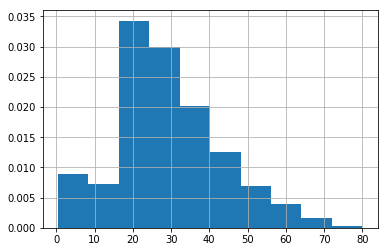

In [0]:
data['Age'].hist(density=True) # density=True выведет долю, а не количество

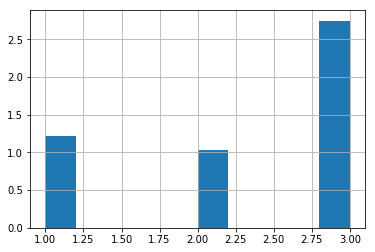

In [0]:
data['Pclass'].hist(density=True)

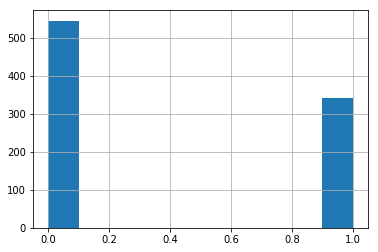

In [0]:
data['Survived'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd15a08c4a8>,
      dtype=object)

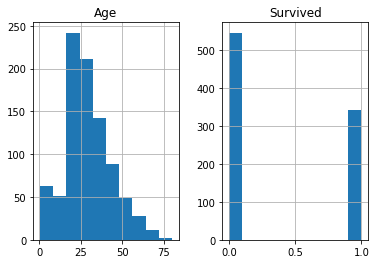

In [0]:
data[['Age', 'Survived']].hist()

In [0]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Survived, dtype: int64

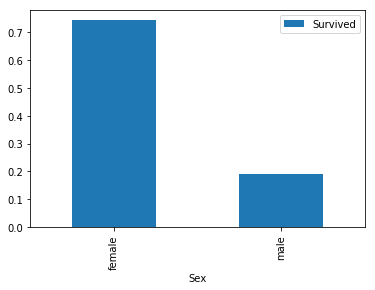

In [0]:
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()

In [0]:
data.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


# Доп задания на закрепление материала

In [0]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [0]:
# решение с использованием numpy
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

# ваш код тут

Среднее арифметическое последовательности 49999999.5
CPU times: user 191 ms, sys: 333 ms, total: 524 ms
Wall time: 534 ms


In [0]:
# решение без использования numpy
# для оценки времени исоплнения блока
%%time

# ваш код тут

Среднее арифметическое последовательности 49999999.5
CPU times: user 10.7 s, sys: 5.2 s, total: 15.9 s
Wall time: 16 s


## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [0]:
# задано изначально
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))



67

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

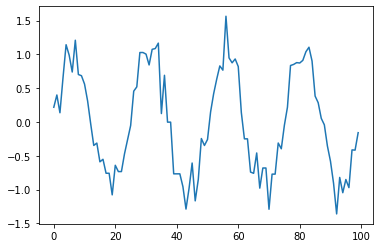

In [0]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут

# отобразим
plt.plot(df.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [0]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


## Задание 6

Посмотрите на блок Exploratory data analysis, используйте данные, кототрые вы загрузили в ходе его освоения. Ваша задача - вывести имена всех выживших детей и их количество

In [0]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [0]:
data